In [1]:
import os, sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import os.path
from os import listdir
import glob
import matplotlib.pyplot as plt
from model_validation import model_validation
from sklearn.metrics import accuracy_score
import numpy as np
from prepare_data import data_split
import json

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
def read_json_data(file_input):

        # Opening JSON file
    file_json_data = open(file_input)
    data_json_data = json.load(file_json_data)
    
    return data_json_data

In [241]:
! scp yggdrasil:/home/nagaia/ctasoft/scripts/cnn_model_dev/2_clases_anom_011__nsb.json ./json_data

2_clases_anom_011__nsb.json                   100% 1320KB   6.4MB/s   00:00    


In [242]:
data_2class_train_nsb_50k = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/2_clases_anom_011__nsb.json')


In [7]:
data_2class_test_showers = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/2_clases_test_shower.json')
data_2class_train_showers = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/2_clases_train_shower.json')
data_2class_tvalidate_showers = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/2_clases_validation_shower.json')

In [128]:
data_2class_test_nsb = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/2_clases_test_nsb.json')
data_2class_train_nsb = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/2_clases_train_nsb.json')
data_2class_tvalidate_nsb = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/2_clases_validation_nsb.json')

In [4]:
data_2class_test_showers['shower_type']

dict_keys(['shower_type', 'energy TeV.', 'asum', 'off_axis', 'phi'])

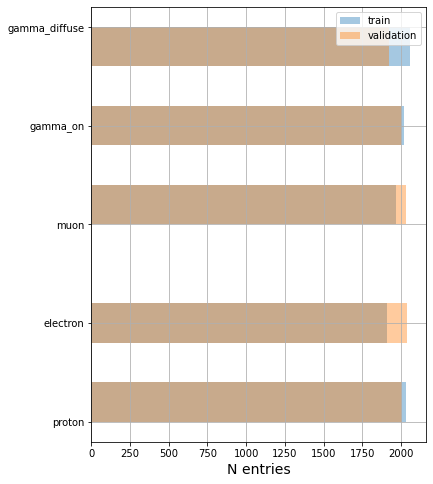

In [169]:
fig, ax0  = plt.subplots(1, figsize=(6,8))

plt.hist(data_2class_train_showers['shower_type'], alpha = 0.4,  label='train', orientation='horizontal')
plt.hist(data_2class_tvalidate_showers['shower_type'], alpha = 0.4,  label='validation', orientation='horizontal')
plt.grid()
plt.legend()
plt.xlabel("N entries", fontsize=14)
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_data_type.png', dpi=800)

In [226]:
data_showers = data_2class_test_showers['shower_type']

In [229]:
data_showers = np.append(data_showers[:5000], [data_showers, data_showers])

In [230]:
len(data_showers)

24994

In [232]:
data_asum = data_2class_test_showers['asum']
data_asum = np.append(data_asum[:5000], [data_asum, data_asum])
print(len(data_asum))

24994


In [252]:
data_energy = data_2class_test_showers['energy TeV.']
data_energy = np.append(data_energy[:5000], [data_energy, data_energy])
print(len(data_energy))

24994


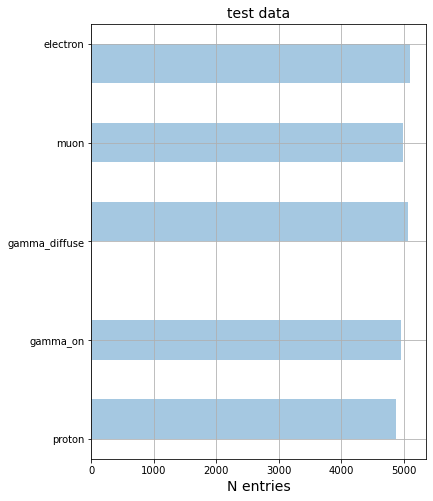

In [251]:
fig, ax0  = plt.subplots(1, figsize=(6,8))

plt.hist(data_showers, alpha = 0.4, orientation='horizontal')
#plt.hist(data_2class_tvalidate_showers['shower_type'], alpha = 0.4,  label='validation', orientation='horizontal')
plt.grid()
#plt.legend()
plt.xlabel("N entries", fontsize=14)
plt.title('test data', fontsize=14)
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_test_data_type.png', dpi=800)

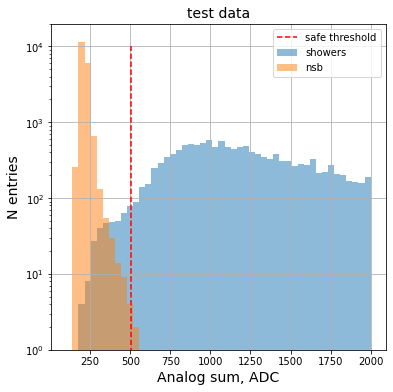

In [256]:
fig, ax0  = plt.subplots(1, figsize=(6,6))
plt.hist(np.append(data_asum, data_2class_showers_wrong['asum']), range = [100, 2000], bins = 50, alpha = 0.5, label='showers')
plt.hist(data_2class_train_nsb_50k['asum'], range = [100, 2000], bins = 50, alpha = 0.5, label='nsb')

plt.plot([505,505], [0., 10e3], '--r', label='safe threshold')
plt.ylim([1., 2e4])
plt.xlabel("Analog sum, ADC", fontsize=14)
plt.yscale('log')
plt.title('test data', fontsize=14)
plt.ylabel("N entries", fontsize=14)
plt.grid()
plt.legend()
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_test_data.png', dpi=800)

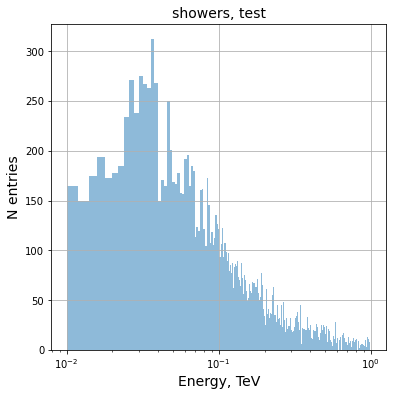

In [255]:
fig, ax0  = plt.subplots(1, figsize=(6,6))
plt.hist(data_energy, range = [0.01, 1], bins = 500, alpha = 0.5)
#plt.hist(data_2class_tvalidate_showers['energy TeV.'], range = [0.01, 1], bins = 500, alpha = 0.5, label='validation')
plt.xscale('log')
plt.xlabel("Energy, TeV", fontsize=14)
plt.title('showers, test', fontsize=14)
plt.ylabel("N entries", fontsize=14)
plt.grid()
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_test_showers_energy.png', dpi=800)

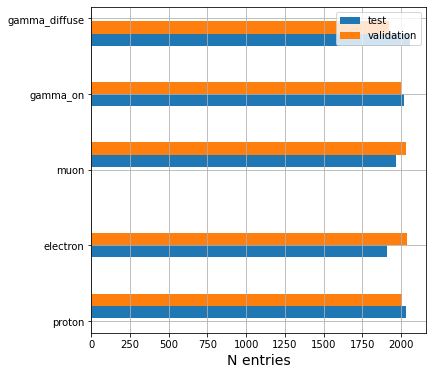

In [183]:
fig, ax0  = plt.subplots(1, figsize=(6,6))
plt.hist([data_2class_train_showers['shower_type'], data_2class_tvalidate_showers['shower_type']], 
         label=['test', 'validation'], orientation='horizontal')
plt.grid()
plt.legend()
plt.xlabel("N entries", fontsize=14)
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_data_type.png', dpi=800)

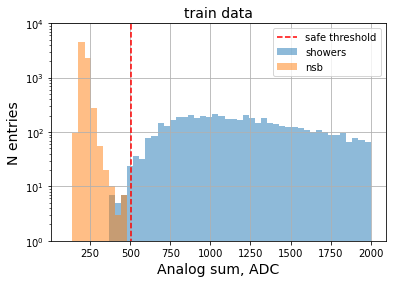

In [157]:
plt.hist(data_2class_train_showers['asum'], range = [100, 2000], bins = 50, alpha = 0.5, label='showers')
plt.hist(data_2class_train_nsb['asum'], range = [100, 2000], bins = 50, alpha = 0.5, label='nsb')
plt.plot([505,505], [0., 10e3], '--r', label='safe threshold')
plt.ylim([1., 1e4])
plt.xlabel("Analog sum, ADC", fontsize=14)
plt.yscale('log')
plt.title('train data', fontsize=14)
plt.ylabel("N entries", fontsize=14)
plt.grid()
plt.legend()
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_train_data.png', dpi=800)

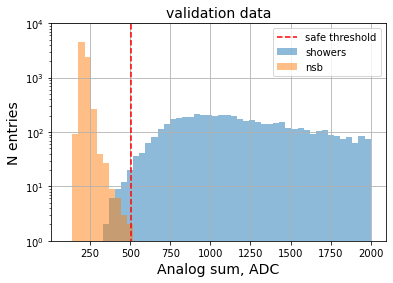

In [156]:
plt.hist(data_2class_tvalidate_showers['asum'], range = [100, 2000], bins = 50, alpha = 0.5, label='showers')
plt.hist(data_2class_tvalidate_nsb['asum'], range = [100, 2000], bins = 50, alpha = 0.5, label='nsb')
plt.plot([505,505], [0., 10e3], '--r', label='safe threshold')
plt.ylim([1., 1e4])
plt.xlabel("Analog sum, ADC", fontsize=14)
plt.yscale('log')
plt.title('validation data', fontsize=14)
plt.ylabel("N entries", fontsize=14)
plt.grid()
plt.legend()
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_validation_data.png', dpi=800)

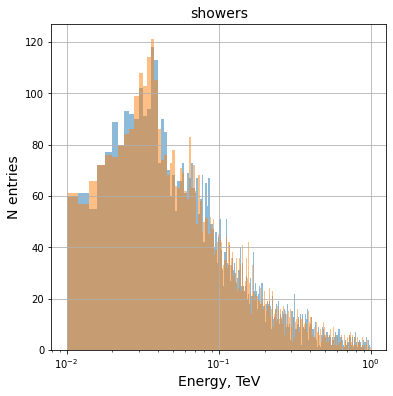

In [194]:
fig, ax0  = plt.subplots(1, figsize=(6,6))
plt.hist(data_2class_train_showers['energy TeV.'], range = [0.01, 1], bins = 500, alpha = 0.5, label='train')
plt.hist(data_2class_tvalidate_showers['energy TeV.'], range = [0.01, 1], bins = 500, alpha = 0.5, label='validation')
plt.xscale('log')
plt.xlabel("Energy, TeV", fontsize=14)
plt.title('showers', fontsize=14)
plt.ylabel("N entries", fontsize=14)
plt.grid()
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_showers_energy.png', dpi=800)

In [188]:
np.sum(a)

7197.0

In [50]:
data_2class_showers_wrong = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/showers_wrong_reco_011.json')
data_2class_nsb_wrong = read_json_data('//home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/nsb_wrong_reco_011.json')

In [206]:
! scp yggdrasil:/home/nagaia/ctasoft/scripts/cnn_model_dev/ResNet/data_* ./json_data/

data_test_011_nsb_wrong.json                  100% 3067   457.4KB/s   00:00    
data_test_011_showrs_wrong.json               100%   22KB   1.6MB/s   00:00    


In [208]:
data_2class_showers_wrong = read_json_data('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/data_test_011_showrs_wrong.json')
data_2class_nsb_wrong = read_json_data('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/json_data/data_test_011_nsb_wrong.json')

In [210]:
data_2class_showers_wrong['asum']

[349.2999999999993,
 303.2999999999993,
 623.0,
 242.2999999999993,
 535.1000000000004,
 475.1000000000004,
 453.5,
 358.3999999999996,
 383.7999999999993,
 289.6000000000004,
 466.8999999999996,
 198.0,
 430.1000000000004,
 295.5,
 425.5,
 435.0,
 882.7000000000007,
 331.5,
 491.2000000000007,
 343.7000000000007,
 328.0,
 258.5,
 472.2999999999993,
 316.3999999999996,
 549.7999999999993,
 376.8999999999996,
 453.2999999999993,
 490.2000000000007,
 363.5,
 303.3999999999996,
 349.2000000000007,
 319.3999999999996,
 496.3999999999996,
 407.6000000000004,
 378.1000000000004,
 377.6000000000004,
 441.7999999999993,
 479.1000000000004,
 303.7999999999993,
 220.8999999999996,
 500.2999999999993,
 353.5,
 303.8999999999996,
 281.6000000000004,
 242.8999999999996,
 646.8999999999996,
 346.6000000000004,
 358.2000000000007,
 398.2999999999993,
 306.7000000000007,
 300.3999999999996,
 527.7000000000007,
 453.0,
 434.1000000000004,
 378.0,
 567.3999999999996,
 416.0,
 392.2999999999993,
 551.600

(array([  0.,   0.,   4.,   8.,  27.,  40.,  47.,  49.,  50.,  63.,  78.,
         88., 141., 154., 246., 295., 354., 377., 437., 507., 521., 497.,
        541., 585., 476., 570., 475., 445., 469., 481., 410., 383., 345.,
        333., 381., 306., 308., 266., 283., 272., 325., 215., 223., 272.,
        210., 203., 169., 164., 159., 192.]),
 array([ 100.,  138.,  176.,  214.,  252.,  290.,  328.,  366.,  404.,
         442.,  480.,  518.,  556.,  594.,  632.,  670.,  708.,  746.,
         784.,  822.,  860.,  898.,  936.,  974., 1012., 1050., 1088.,
        1126., 1164., 1202., 1240., 1278., 1316., 1354., 1392., 1430.,
        1468., 1506., 1544., 1582., 1620., 1658., 1696., 1734., 1772.,
        1810., 1848., 1886., 1924., 1962., 2000.]),
 <BarContainer object of 50 artists>)

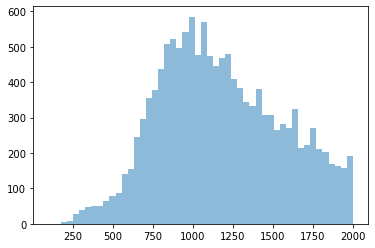

In [263]:
plt.hist(np.append(data_asum, data_2class_showers_wrong['asum']), range = [100, 2000], bins = 50, alpha = 0.5, label='showers')


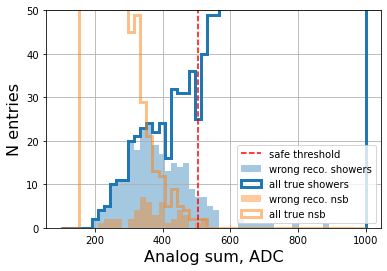

In [284]:
plt.hist(data_2class_showers_wrong['asum'], range = [100, 1000], bins = 50, label='wrong reco. showers', alpha = 0.4)
plt.hist(np.append(data_asum, data_2class_showers_wrong['asum']), range = [100, 1000], histtype='step', bins = 50, linewidth=3, color ='tab:blue', label='all true showers')
#plt.hist()
plt.hist(data_2class_nsb_wrong['asum'], range = [100, 1000], bins = 50, label='wrong reco. nsb', alpha = 0.4)

plt.hist(data_2class_train_nsb_50k['asum'], range = [100, 1000], bins = 50, alpha = 0.5, histtype='step', linewidth=3, color ='tab:orange', label='all true nsb')

#plt.hist(np.append(data_asum, data_2class_showers_wrong['asum']), range = [100, 1000], bins = 50, alpha = 0.5, label='showers')
plt.plot([505,505], [0., 3e3], '--r', label='safe threshold')
plt.ylim([0., 50])
plt.xlabel("Analog sum, ADC", fontsize=16)
#plt.title('wrongly reco. data', fontsize=16)
plt.ylabel("N entries", fontsize=16)
plt.grid()
plt.legend(loc=4)
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_wrong_asum_v2.png', dpi=800)

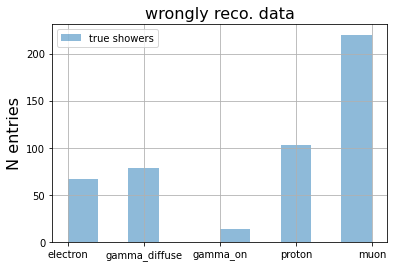

In [212]:
plt.hist(data_2class_showers_wrong['shower_type'], alpha = 0.5, label='true showers')
#plt.hist(data_2class_nsb_wrong['shower_type'], alpha = 0.5, label='true nsb')
plt.title('wrongly reco. data', fontsize=16)
plt.ylabel("N entries", fontsize=16)
plt.legend()
plt.grid()
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_wrong_particle_type.png', dpi=800)

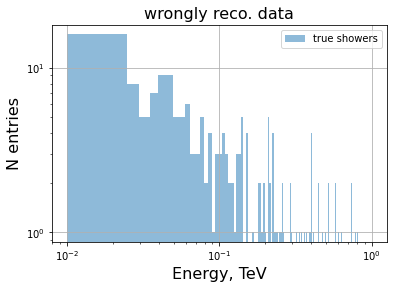

In [124]:
plt.hist(data_2class_showers_wrong['energy TeV.'], range = [0.01, 1], bins = 200, alpha = 0.5, label='true showers')
#plt.hist(data_2class_nsb_wrong['energy TeV.'], range = [0.01, 1], bins = 200, alpha = 0.5, label='true nsb')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Energy, TeV", fontsize=16)
plt.title('wrongly reco. data', fontsize=16)
plt.ylabel("N entries", fontsize=16)
plt.legend()
plt.grid()
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/res_net_2st_wrong_energy.png', dpi=800)

In [53]:
data_2class_showers_wrong['shower_type']

['electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'electron',
 'gamma_diffuse',
 'gamma_diffuse',
 'gamma_diffuse',
 'gamma_diffuse',
 'gamma_diffuse',
 'gamma_diffuse',
 'gamma_diffuse',
 'gamma_diffuse'

In [58]:
df_showrs_wrong = pd.DataFrame.from_dict(data_2class_showers_wrong)

(array([101.,   0.,   0.,   0.,   0.,   0., 111.,   0.,   0.,   9.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

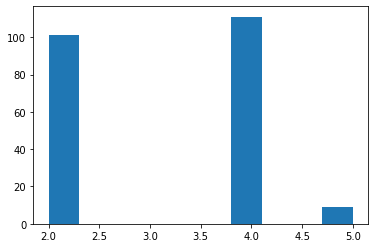

In [98]:
plt.hist(1000.*df_showrs_wrong[df_showrs_wrong['shower_type'] == 'muon']['energy TeV.'])

(array([34.,  6., 22., 14., 31., 42., 13., 17., 23., 19.]),
 array([0.02 , 0.311, 0.602, 0.893, 1.184, 1.475, 1.766, 2.057, 2.348,
        2.639, 2.93 ]),
 <BarContainer object of 10 artists>)

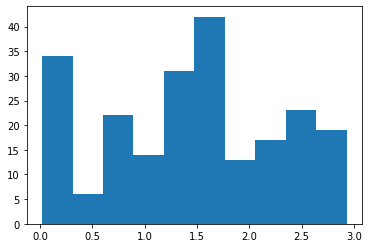

In [93]:
plt.hist(df_showrs_wrong[df_showrs_wrong['shower_type'] == 'muon']['off_axis'])

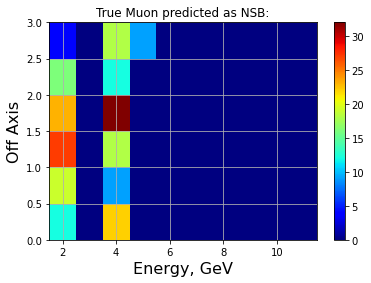

In [285]:
import matplotlib as mpl

plt.hist2d(1000*df_showrs_wrong[df_showrs_wrong['shower_type'] == 'muon']['energy TeV.'], df_showrs_wrong[df_showrs_wrong['shower_type'] == 'muon']['off_axis'],
           range = [[1.5, 11.5],[0,3]], bins = [10, 6], cmap=plt.cm.jet)
plt.colorbar()
plt.grid()
plt.title('True Muon predicted as NSB:')
plt.xlabel("Energy, GeV", fontsize=16)  
plt.ylabel("Off Axis", fontsize=16)
plt.savefig('/home/andrii/work/cnn/vgg16_train_model/cnn_model_dev/ResNet/muon_nsb.png', dpi=800)
plt.show()

In [290]:
df_showrs_wrong[df_showrs_wrong['shower_type'] == 'muon']

shower_type  energy TeV.  asum  off_axis     phi
261        muon        0.002   NaN      0.02  344.56
262        muon        0.002   NaN      0.02  344.56
263        muon        0.002   NaN      0.02  344.56
264        muon        0.002   NaN      0.02  344.56
265        muon        0.002   NaN      0.02  344.56
..          ...          ...   ...       ...     ...
477        muon        0.005   NaN      2.84   82.35
478        muon        0.005   NaN      2.84   82.35
479        muon        0.005   NaN      2.84   82.35
480        muon        0.005   NaN      2.84   82.35
481        muon        0.005   NaN      2.84   82.35

[221 rows x 5 columns]

In [288]:
df_showrs_wrong['asum']

0      349.3
1      303.3
2      623.0
3      242.3
4      535.1
       ...  
477      NaN
478      NaN
479      NaN
480      NaN
481      NaN
Name: asum, Length: 482, dtype: float64

In [121]:
df_showrs_wrong[df_showrs_wrong['shower_type'] == 'muon']['energy TeV.']

261    0.002
262    0.002
263    0.002
264    0.002
265    0.002
       ...  
477    0.005
478    0.005
479    0.005
480    0.005
481    0.005
Name: energy TeV., Length: 221, dtype: float64

In [ ]:
iforest_anomaly = iforest_results[iforest_results['Anomaly']==1]